In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
demo = pd.read_csv('DEMO.csv')
mclass = pd.read_csv('MCLASS.csv')
txkea = pd.read_csv('TXKEA.csv')

/var/folders/9m/3m9g9yzs77j2m_79z47fjdr00000gq/T/ipykernel_59590/2206552592.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  demo = pd.read_csv('DEMO.csv')


In [4]:
demo.isna().sum()

student_id     0
district_id    0
ethnicity      0
eco            0
el             0
spec_ed        0
dtype: int64

In [6]:
mclass.isna().sum()
#check for nulls
#keep all rows because score is not very relevant given the information from the senario

student_id               0
district_id           6240
school_id             6592
assessment_edition       0
composite_level          0
composite_score       7144
dtype: int64

In [8]:
txkea.isna().sum()

district_id                0
student_id                 0
language                   0
lit_screening_benchmark    0
lit_screening_score        0
date                       0
dtype: int64

In [9]:
from pandasql import sqldf

In [10]:
query = 'select d.*, m.composite_level as mclass_lvl, m.composite_score as mclass_score, \
t.lit_screening_benchmark as txkea_level, t.lit_screening_score as txkea_score \
from demo as d \
left join mclass as m on d.student_id = m.student_id \
left join txkea as t on d.student_id = t.student_id \
where m.assessment_edition = \'DIBELS 8th Edition\' \
or t.language = \'English\';'

# this query makes a df of all students who took either the mclass or txkea tests in English, their scores,
# and some of their demographics

In [11]:
result = sqldf(query, locals())

In [12]:
result.head(1000)

,student_id,district_id,ethnicity,eco,el,spec_ed,mclass_lvl,mclass_score,txkea_level,txkea_score
0,885938600,53405,White,YES,NO,NO,None,NaN,On-Track,37.0
1,871944576,798403,Black or African American,YES,NO,NO,None,NaN,On-Track,21.0
2,818725252,53405,White,NO,NO,NO,None,NaN,On-Track,42.0
3,702015143,800409,White,YES,NO,YES,None,NaN,On-Track,19.0
4,717968813,48403,Two or more races,YES,NO,NO,None,NaN,On-Track,21.0
...,...,...,...,...,...,...,...,...,...,...
995,8855137252,808486,Black or African American,YES,NO,NO,None,NaN,On-Track,34.0
996,8855119496,858403,Hispanic/Latino,YES,NO,NO,None,NaN,On-Track,20.0
997,8855498655,801405,Hispanic/Latino,NO,NO,NO,Above Benchmark,332.0,None,NaN
998,8855427253,1407,Hispanic/Latino,YES,NO,YES,Below Benchmark,289.0,None,NaN


In [13]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150257 entries, 0 to 150256
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   student_id    150257 non-null  object 
 1   district_id   150257 non-null  int64  
 2   ethnicity     150257 non-null  object 
 3   eco           150257 non-null  object 
 4   el            150257 non-null  object 
 5   spec_ed       150257 non-null  object 
 6   mclass_lvl    56155 non-null   object 
 7   mclass_score  56149 non-null   float64
 8   txkea_level   94573 non-null   object 
 9   txkea_score   94573 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 11.5+ MB


# Data exploration and Analysis

## How many students took each test?


In [57]:
mclass = result[result['mclass_lvl'].notna()]
len(mclass)
# number of students that took mclass

56155

In [59]:
txkea = result[result['txkea_level'].notna()]
len(txkea)
#number of students that took txkea

94573

## How many students with each specifier took each assessment?

In [72]:
result.to_csv('clean_data.csv', index=False)
eco = result[result['eco'] == 'YES']

In [73]:
eco_mclass = eco[eco['mclass_lvl'].notna()]
len(eco_mclass)
#number of  eco dis students that took mclass test

33331

In [74]:
eco_txkea = eco[eco['txkea_level'].notna()]
len(eco_txkea)
#number of eco dis students that took txkea test

56100

In [75]:
el = result[result['el'] == 'YES']
el_mclass = el[el['mclass_lvl'].notna()]
el_txkea = el[el['txkea_level'].notna()]
#finding number of el students that took mclass and txkea


In [84]:
sped = result[result['spec_ed'] == 'YES']
sped_mclass =sped[sped['mclass_lvl'].notna()]
sped_txkea = sped[sped['txkea_level'].notna()]
#finding number of sped students that took mclass and txkea


In [85]:
graph = pd.DataFrame(
{ "mclass" : [len(sped_mclass), len(el_mclass), len(eco_mclass)],
 "txkea" : [len(sped_txkea), len(el_txkea), len(eco_txkea)]}, index = ['sped', 'el', 'eco'])
#creating dataframe to reflect values found

In [86]:
graph

,mclass,txkea
sped,4084,7220
el,7785,11879
eco,33331,56100


In [87]:
graph.mclass = round(graph.mclass/len(mclass), 3) * 100
graph.txkea = round(graph.txkea/len(txkea), 3) * 100
#turning numbers into proportions

In [88]:
graph

,mclass,txkea
sped,7.3,7.6
el,13.9,12.6
eco,59.4,59.3


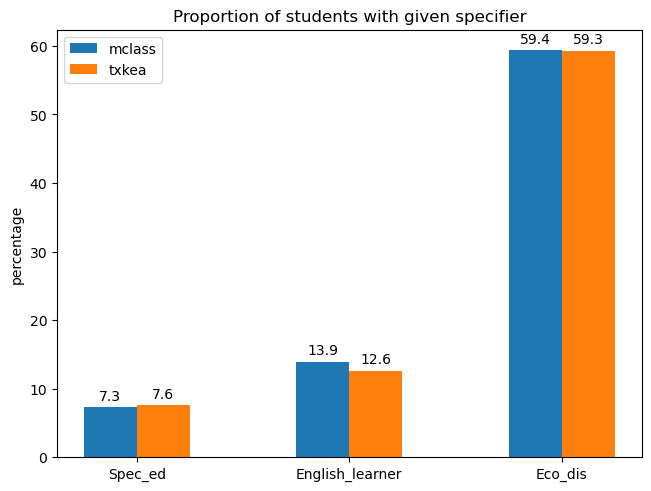

In [99]:
species = ("Spec_ed", "English_learner", "Eco_dis")
penguin_means = {
    'mclass': (7.3, 13.9, 59.4),
    'txkea': (7.6, 12.6, 59.3),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('percentage')
ax.set_title('Proportion of students with given specifier')
ax.set_xticks(x + .125, species)
ax.legend()


plt.show()

It appears that the proportion of special education students, English learning students, and Economically Disadvantaged students are almost equal across both assessments. This may suggest that these specifiers do not have an impact on the performance gap across assessments.

## How many students of each demographic took each assessment?

In [101]:
cnt = 0
  
# list to hold visited values
visited = []
  
# loop for counting the unique
# values in height
for i in range(0, len(result['ethnicity'])):
    
    if result['ethnicity'][i] not in visited: 
        
        visited.append(result['ethnicity'][i])
          
        cnt += 1
  

In [102]:
cnt

7

In [103]:
visited

['White',
 'Black or African American',
 'Two or more races',
 'Hispanic/Latino',
 'American Indian or Alaska Nat',
 'Asian',
 'Native Hawaiian/Other Pacific']